In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.cm as cm

In [ ]:
df=pd.read_csv('/content/Daily_AI_Assistant_Usage_Behavior_Dataset.csv')

In [ ]:
df.head(5)

,timestamp,device,usage_category,prompt_length,session_length_minutes,satisfaction_rating,assistant_model,tokens_used
0,2025-02-20 03:29:00,Desktop,Education,14,7.08,5,GPT-5.1,44
1,2025-01-08 18:28:00,Mobile,Daily Tasks,32,13.07,2,GPT-4o,1047
2,2025-01-12 17:56:00,Smart Speaker,Education,236,10.15,4,GPT-4o,1379
3,2025-01-04 09:11:00,Smart Speaker,Productivity,98,14.45,1,GPT-5,1105
4,2025-02-14 19:59:00,Smart Speaker,Research,220,4.50,5,GPT-5.1,107


In [ ]:
df.shape

(300, 8)

In [ ]:
df.describe()

,prompt_length,session_length_minutes,satisfaction_rating,tokens_used
count,300.000000,300.000000,300.000000,300.000000
mean,129.123333,7.747100,2.986667,780.536667
std,70.048011,4.325186,1.411784,428.272858
min,5.000000,0.200000,1.000000,32.000000
25%,67.750000,4.112500,2.000000,393.250000
50%,132.500000,7.690000,3.000000,797.500000
75%,187.250000,11.572500,4.000000,1143.250000
max,250.000000,14.990000,5.000000,1500.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   timestamp               300 non-null    object 
 1   device                  300 non-null    object 
 2   usage_category          300 non-null    object 
 3   prompt_length           300 non-null    int64  
 4   session_length_minutes  300 non-null    float64
 5   satisfaction_rating     300 non-null    int64  
 6   assistant_model         300 non-null    object 
 7   tokens_used             300 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


In [ ]:
df.isnull().sum()

,0
timestamp,0
device,0
usage_category,0
prompt_length,0
session_length_minutes,0
satisfaction_rating,0
assistant_model,0
tokens_used,0


In [ ]:
df.drop_duplicates(inplace=True)

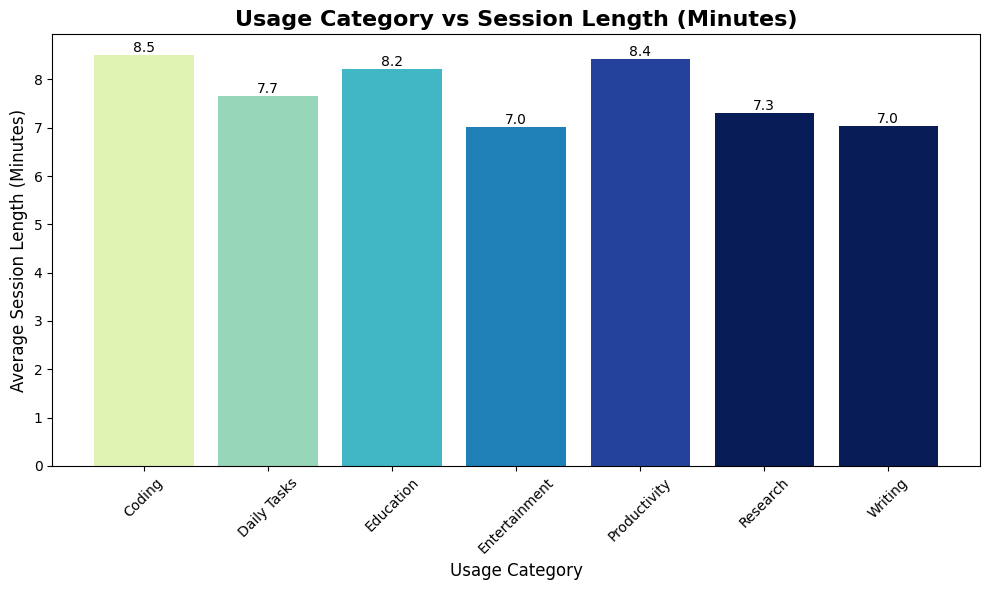

In [ ]:
# Grouping: average session length per usage category
grouped_data = df.groupby("usage_category")["session_length_minutes"].mean()

# Generate YlGnBu colors
cmap = cm.get_cmap("YlGnBu", len(grouped_data))
colors = cmap(np.linspace(0.2, 1, len(grouped_data)))  # smoother colors

plt.figure(figsize=(10, 6))

bars = plt.bar(grouped_data.index, grouped_data.values, color=colors)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.1f}",
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.xlabel("Usage Category", fontsize=12)
plt.ylabel("Average Session Length (Minutes)", fontsize=12)
plt.title("Usage Category vs Session Length (Minutes)", fontsize=16, weight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

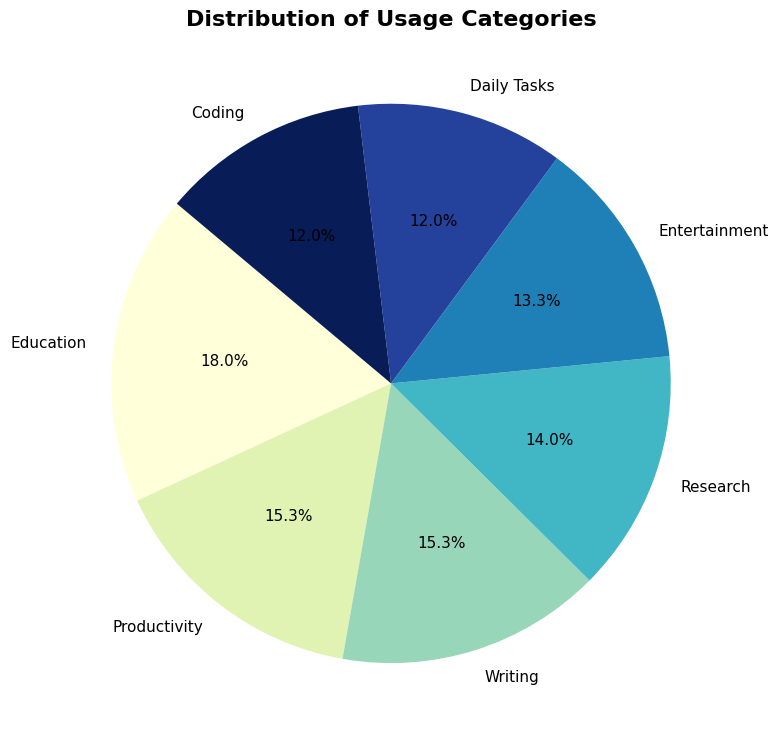

In [ ]:
# Count the number of entries in each usage category
category_counts = df["usage_category"].value_counts()

# Generate YlGnBu colors
cmap = cm.get_cmap("YlGnBu", len(category_counts))
colors = cmap(np.linspace(0, 1, len(category_counts)))

plt.figure(figsize=(8, 8))

plt.pie(
    category_counts.values,
    labels=category_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 11}
)

plt.title("Distribution of Usage Categories", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

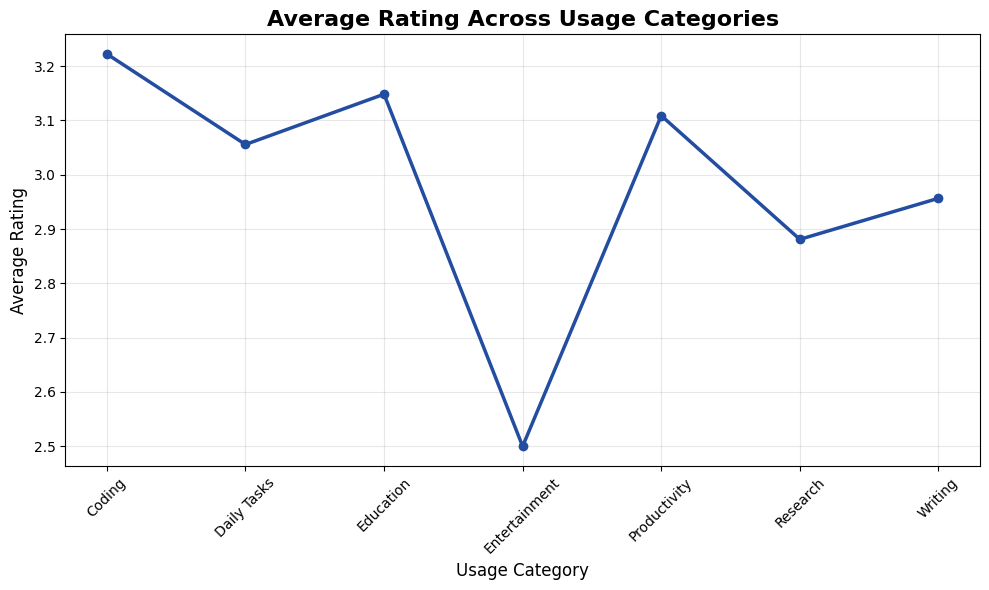

In [ ]:
# Group by category and calculate average rating
category_rating = df.groupby("usage_category")["satisfaction_rating"].mean()

# Get a color from YlGnBu colormap
cmap = cm.get_cmap("YlGnBu")
color = cmap(0.8)   # 0 → yellow, 1 → dark blue (you can adjust)

plt.figure(figsize=(10, 6))

plt.plot(
    category_rating.index,
    category_rating.values,
    marker='o',
    linewidth=2.5,
    color=color
)

plt.xlabel("Usage Category", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.title("Average Rating Across Usage Categories", fontsize=16, weight='bold')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

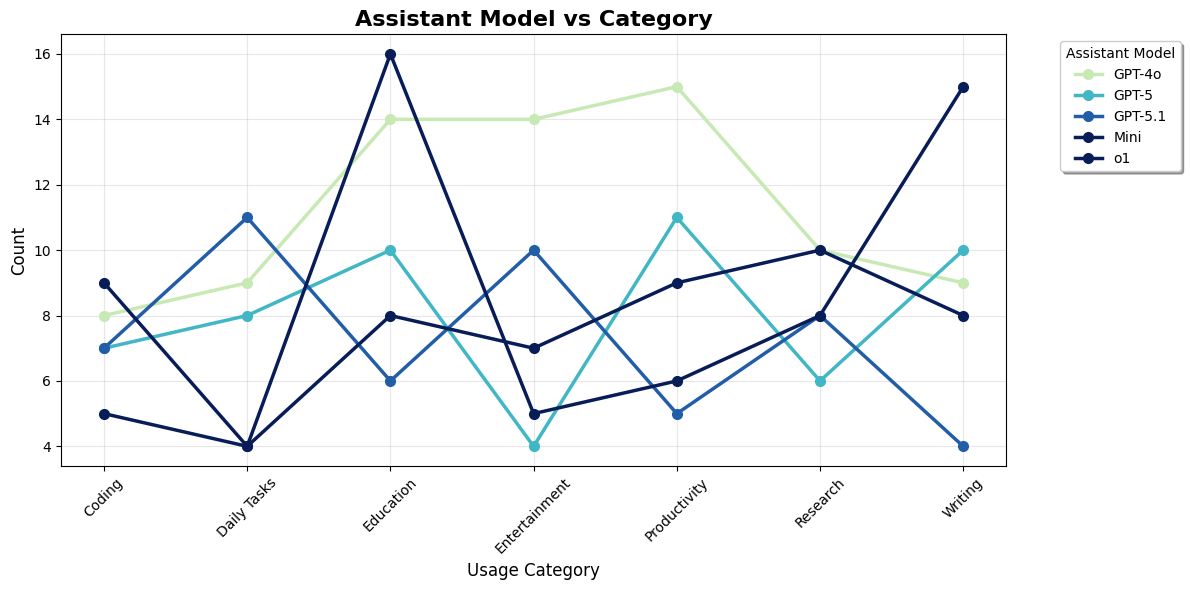

In [ ]:
# Group by category and assistant_model count
grouped = df.groupby(['usage_category', 'assistant_model']).size().reset_index(name='count')

# Pivot for line chart
pivot_df = grouped.pivot(index='usage_category', columns='assistant_model', values='count').fillna(0)

# YlGnBu color palette — 1 color per assistant model
cmap = cm.get_cmap("YlGnBu", pivot_df.shape[1])
colors = cmap(np.linspace(0.2, 1, pivot_df.shape[1]))

plt.figure(figsize=(12, 6))

# Plot each line with colors
for idx, model in enumerate(pivot_df.columns):
    plt.plot(
        pivot_df.index,
        pivot_df[model],
        marker='o',
        markersize=7,
        linewidth=2.5,
        color=colors[idx],
        label=model
    )

plt.xlabel("Usage Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Assistant Model vs Category", fontsize=16, weight="bold")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)

# Beautiful legend styling
plt.legend(
    title="Assistant Model",
    bbox_to_anchor=(1.05, 1),
    frameon=True,
    shadow=True
)

plt.tight_layout()
plt.show()

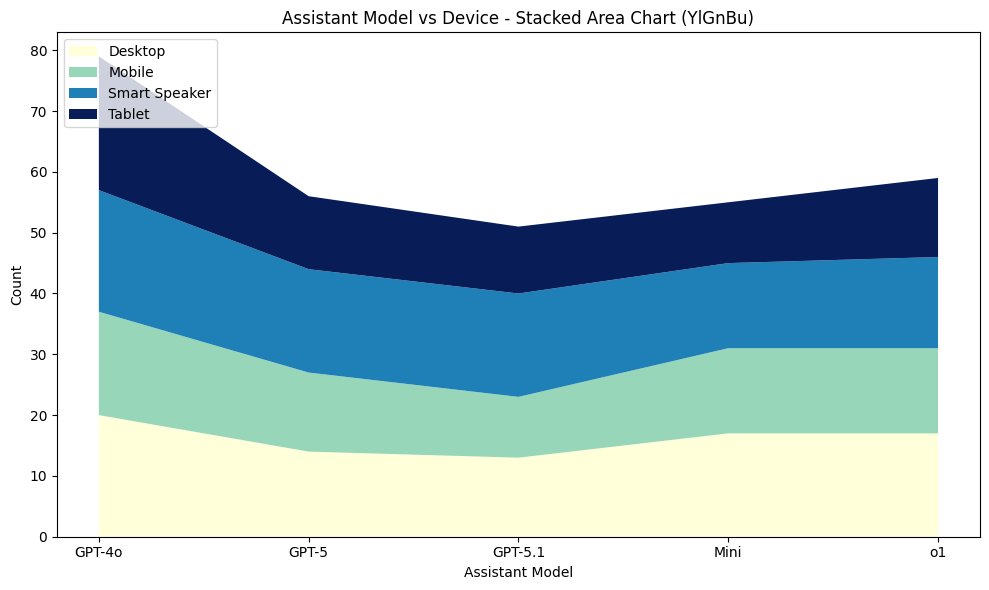

In [ ]:
# Pivot table
pivot_df = df.groupby(['assistant_model', 'device']).size().unstack(fill_value=0)

# Load colormap
cmap = cm.get_cmap("YlGnBu", pivot_df.shape[1])   # one color per device
colors = cmap(np.linspace(0, 1, pivot_df.shape[1]))

plt.figure(figsize=(10, 6))

# Apply colors to stackplot
plt.stackplot(
    pivot_df.index,
    pivot_df.T,
    colors=colors
)

plt.legend(pivot_df.columns, loc='upper left')
plt.xlabel("Assistant Model")
plt.ylabel("Count")
plt.title("Assistant Model vs Device - Stacked Area Chart (YlGnBu)")
plt.tight_layout()
plt.show()

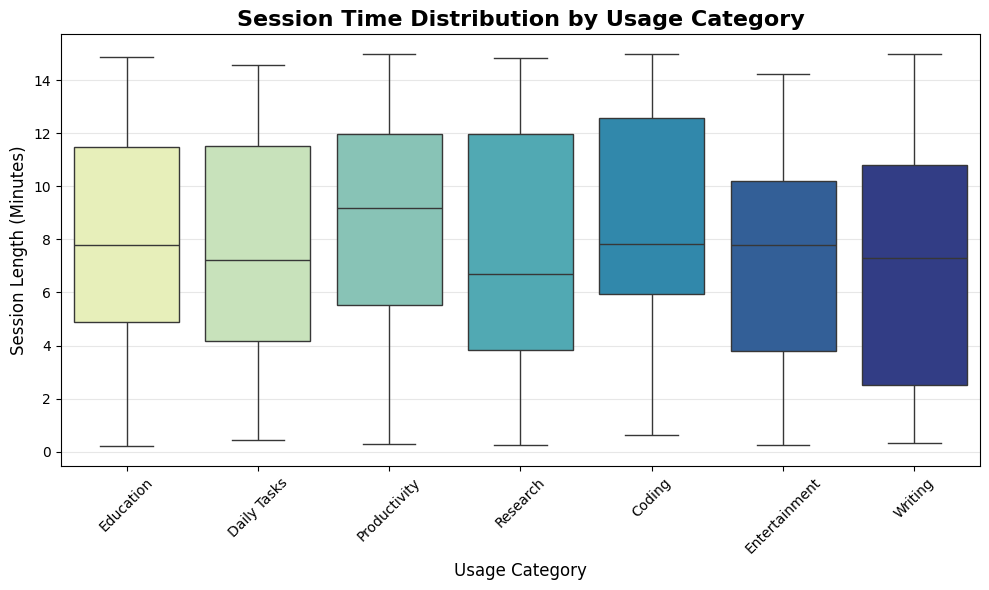

In [ ]:
plt.figure(figsize=(10, 6))

# Seaborn boxplot with YlGnBu palette
sns.boxplot(
    data=df,
    x='usage_category',
    y='session_length_minutes',
    palette="YlGnBu"
)

plt.title("Session Time Distribution by Usage Category", fontsize=16, weight='bold')
plt.xlabel("Usage Category", fontsize=12)
plt.ylabel("Session Length (Minutes)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

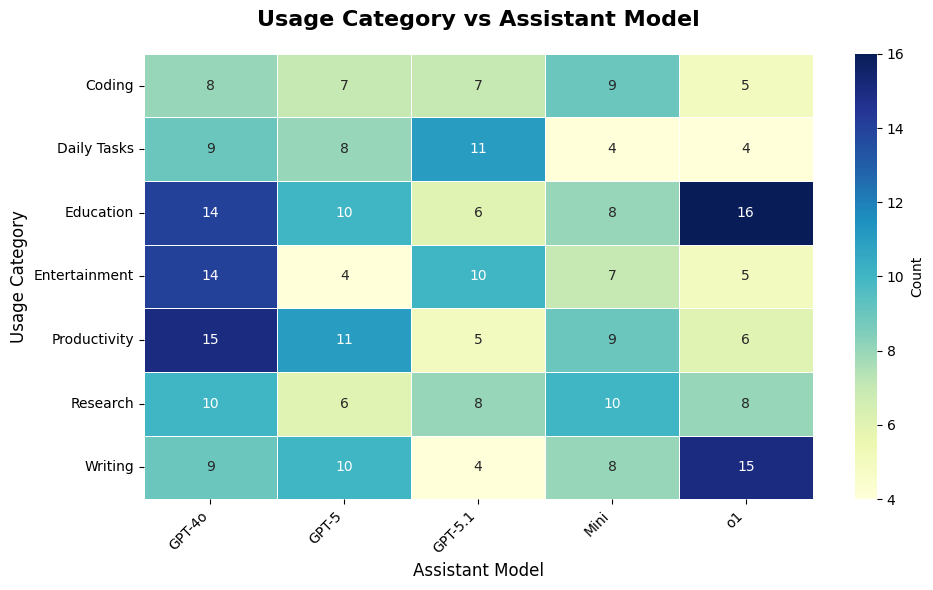

In [ ]:
pivot_df = df.groupby(['usage_category', 'assistant_model']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))

sns.heatmap(
    pivot_df,
    annot=True,
    fmt="d",
    cmap="YlGnBu",
    linewidths=0.5,
    cbar_kws={"label": "Count"}
)

plt.title("Usage Category vs Assistant Model", fontsize=16, weight='bold', pad=20)
plt.xlabel("Assistant Model", fontsize=12)
plt.ylabel("Usage Category", fontsize=12)

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()